In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Testing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error  
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import r2_score 

# Load Dataset

In [2]:
columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age', 'compressive_strength']
dataset = pd.read_excel('./Concrete_Data.xls', names=columns)

# Data exploration

In [3]:
dataset.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
dataset.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
dataset.isna().sum()

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

# Correlation Matrix

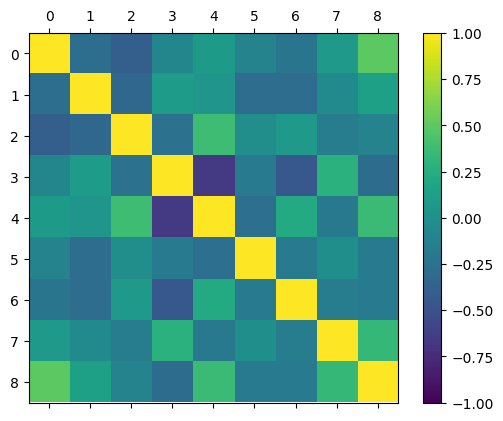

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)

# PCA preprocessing


In [7]:
features = columns[:-1]
targets = columns[-1:]

In [8]:
X = dataset[features]
y = dataset[targets]

In [9]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
y.head()

,compressive_strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


<Axes: >

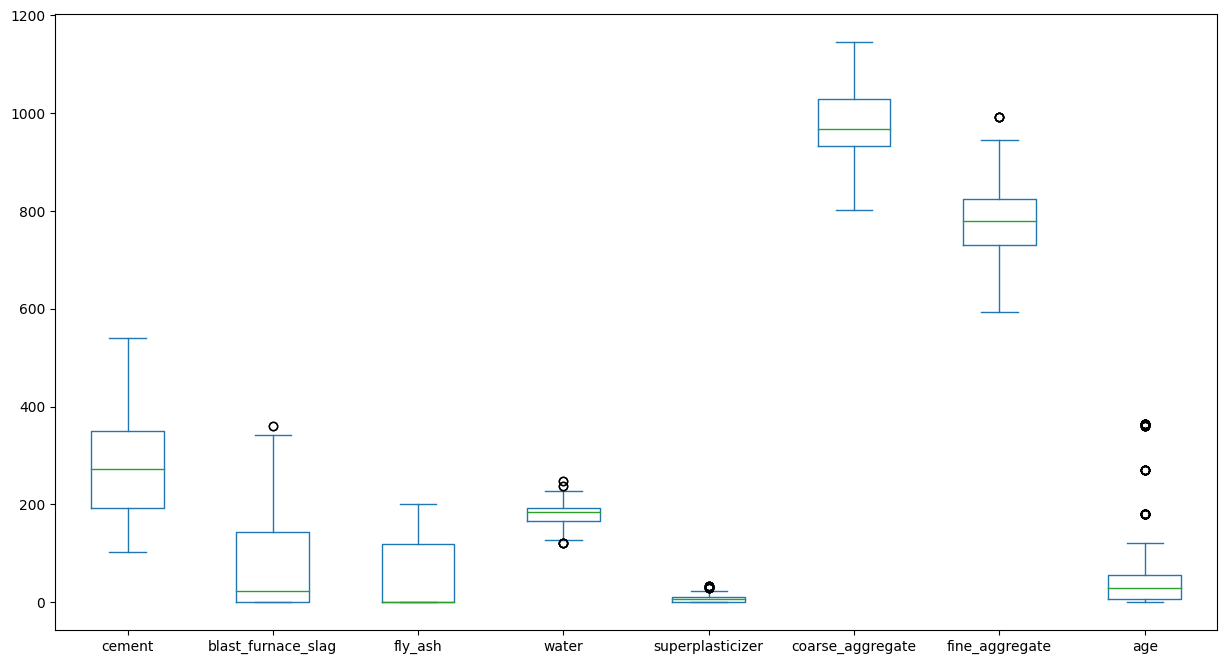

In [11]:
X.plot(kind='box', figsize=(15, 8))

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

<Axes: >

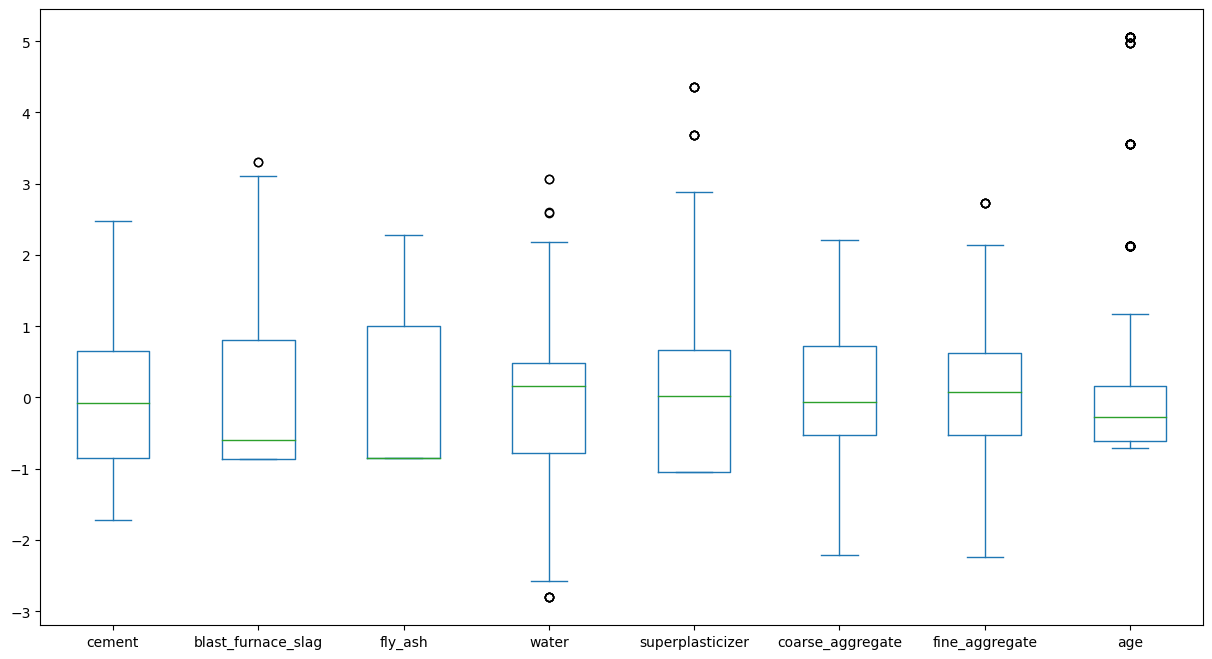

In [13]:
X_scaled.plot(kind='box', figsize=(15, 8))

# PCA

In [14]:
pca = PCA(3)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['component_1', 'component_2', 'component_3'])

In [15]:
X_pca.head()

,component_1,component_2,component_3
0,0.678942,-1.452251,2.391055
1,0.686287,-1.573914,2.357748
2,4.155677,0.361971,0.361423
3,4.594304,0.172874,0.513357
4,2.363531,-0.276274,-0.276059


In [16]:
# It tells us how much variance or information a feature has.
print('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.28498605 0.17702642 0.16753038]


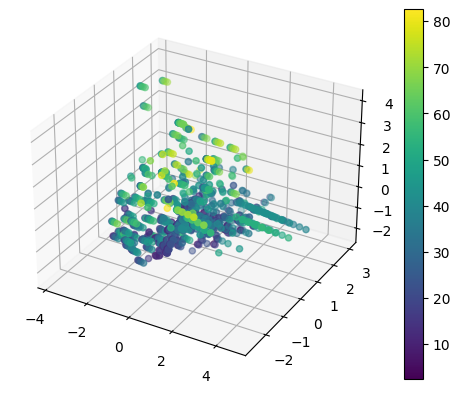

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
pts = ax.scatter(
    X_pca['component_1'].values,
    X_pca['component_2'].values,
    X_pca['component_3'].values,
    c=dataset['compressive_strength'],
)

fig.colorbar(pts)

# Model selection

In [19]:
algorithmns = [
    ('LinearRegression', make_pipeline(StandardScaler(), PCA(3), LinearRegression())),
    ('Ridge', make_pipeline(StandardScaler(), PCA(3), Ridge())),
    ('Lasso', make_pipeline(StandardScaler(), PCA(3), Lasso())),
    ('ElasticNet', make_pipeline(StandardScaler(), PCA(3), ElasticNet())),
    ('KNeighborsRegressor', make_pipeline(StandardScaler(), PCA(3), KNeighborsRegressor())),
    ('DecisionTreeRegressor', make_pipeline(StandardScaler(), PCA(3), DecisionTreeRegressor())),
]

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
kfold = KFold()

results = []
for name, algorithmn in algorithmns:
    cv_results = cross_val_score(algorithmn, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')


LinearRegression: 0.32005527395442285 (0.03982722747714288)
Ridge: 0.32006643617980646 (0.03976198284816194)
Lasso: 0.3142015975137776 (0.03659277122138263)
ElasticNet: 0.29048736379720436 (0.027851219966248345)
KNeighborsRegressor: 0.4744402627178787 (0.02862020037430237)
DecisionTreeRegressor: 0.37218808729588365 (0.06966904107104573)


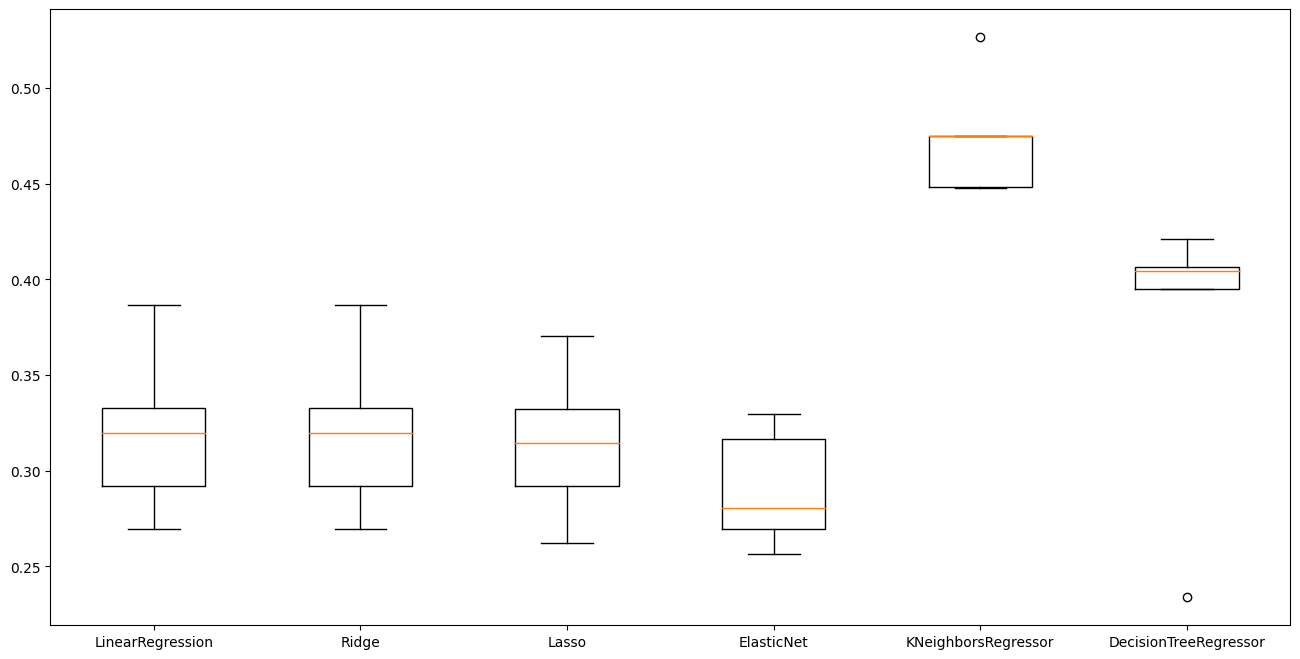

In [21]:
fig = plt.figure()
fig.set_size_inches(16, 8)
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels([name for name, _ in algorithmns])
plt.show()

# Model building

In [22]:
knn = make_pipeline(StandardScaler(), PCA(3), KNeighborsRegressor())
knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [23]:
y_pred = knn.predict(X_valid)

print("Mean squared error:", mean_squared_error(y_valid, y_pred))
print("Mean absolute error:", mean_absolute_error(y_valid, y_pred))
print("Explained variance score:", explained_variance_score(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

Mean squared error: 133.61954504185172
Mean absolute error: 9.262078427967129
Explained variance score: 0.509324496435034
R2 score: 0.5085183127336897


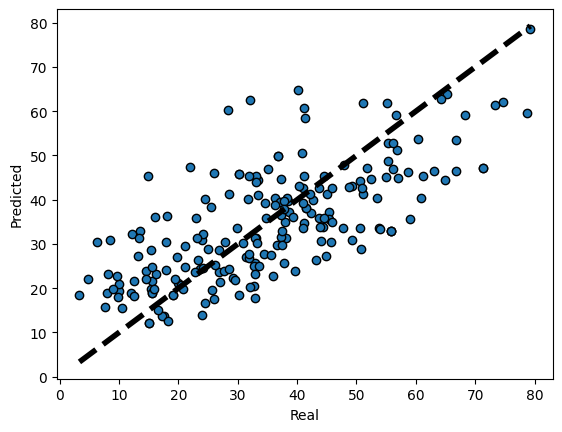

In [24]:
fig, ax = plt.subplots()

ax.scatter(y_valid, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)

ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()